## **CMP9780M** Applied Signal and Image Processing, **EGR3031** Signal Processing and System Identification. and **BME3002** Biomedical Imaging and Signal Processing 
#### Week 1: Working Within the GitHuB Classroom Environment

In this workshop, we will familiarise ourselves with the GitHub Classroom environment. There is also a supplementary task to help you understand the Nyquist Theorem and Aliasing.

## 1. Main Task

**The Signal S** has a Sample frequency (**Fs**) = 2<sup>10</sup>, you could estimate the period **T**, using the relation T = 1/ Fs. The signal length (**L**) = 2 seconds, the amplitude of the signal (**A**) = 0.9, and the signal’s frequency (**ω**) = 15. The sample period (**dt**) should be expressed in terms of the sample Frequency. Write down the relation to represent the sinusoid of this signal.

**The is signal:** `S = A * np.sin(2 * np.pi * ω * t)`

#### Import libraries
Let's import the various libraries and functions to be used in this workshop.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#### Specifying common parameters for all the signals
> You should replace the variables, which are currently set to None with appropriate expressions or values.

In [3]:
# Uncomment these variables and assign appropriate expression or values
Fs = 1024 #mpling frequency
dt = 1/Fs # Sampling period
L = 2 # Length of signal in seconds
t = np.arange(0,L,1/Fs)  # Time vector using np.arange
A = 0.9 
w = 15

#### Task 1.1: Create the Signal
> You should replace the variable, S,  which is currently set to None with appropriate expression.

In [4]:
# Assign the correct expression to the variable S1
S = A*np.sin(2*np.pi*w*t)

#### Task 1.2

Produce a plot for the signal (**S**) from 1:200, e.g. plot (t(1:200), y(1:200)) and fix the axes according to the plots provided (seconds/milliseconds, etc.)
> The codes have been provided for you just uncomment

Text(0, 0.5, 'S(t)')

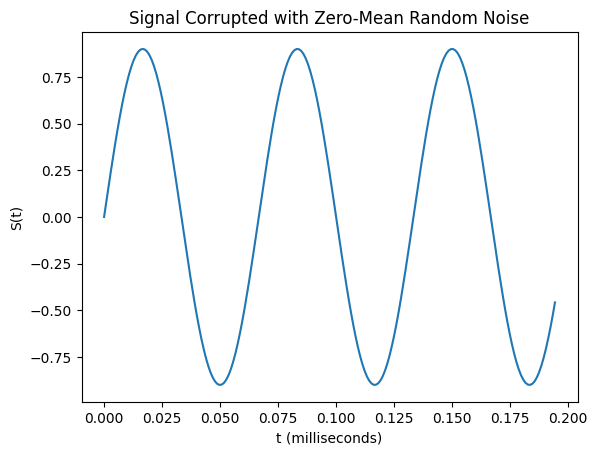

In [5]:

 plt.figure(1)
 plt.plot(t[:200], S[:200])
 plt.title('Signal Corrupted with Zero-Mean Random Noise')
 plt.xlabel('t (milliseconds)')
 plt.ylabel('S(t)')

## 2. Supplementary Task 
### **Nyquist Theorem and Aliasing**
We shall use the Nyquist theorem to show aliasing effect in time domain. According to the Nyquist theorem, to avoid aliasing $$ f_s \geq 2 f_{max}$$.
where

* $f_s$ = sampling frequency
* $f_{max}$ = highest frequency in the signal

If $f_s < 2 f_{max}$, aliasing occurs, and the apparent frequency is given by:

$$
f_{alias} = | f - k f_s |, \quad k \in \mathbb{Z}
$$

#### Import Additional libraries
Let's import some additional libraries and functions that we will use for the remainder of the workshop.

In [6]:
from scipy.io import wavfile
from scipy.signal import resample

#### Load the audio signal
We should use wavfile.read, details at: https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.wavfile.read.html, to load the audio file sine_50Hz included with you repo.


In [7]:
fs, signal = wavfile.read("sine_50Hz.wav")   
signal = signal.astype(float)

# If stereo, take one channel
if signal.ndim > 1:
    signal = signal[:,0]

#### Define the Nyquist rate
$$ f_s \geq 2 f_{max}$$

In [7]:
f_max = fs / 2
print("Original sample rate:", fs, "Hz")
print("Nyquist frequency:", f_max, "Hz")

Original sample rate: 1000 Hz
Nyquist frequency: 500.0 Hz


#### **Task 2.1:** Define two new sampling frequencies
The first should be way above the Nyquist (fs_above), and the second way below it (fs_below). ***You should replace the variable which are currently set to None with appropriate values.***

In [9]:
fs_above = int(fs/1.5)
fs_below = int(fs/8) 

#### **Task 2.2:** Resample signals
Now. resample the originl loaded signal using the new ssample frequencies, fs_above and fs_nelow. Tip: use the resample from scipy.signal, details available at: https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.resample.html. ***You should replace the variables, signal_above and signal_below, which is currently set to None with appropriate values/function/expression.***

In [10]:
# ****Uncomment these two lines****
N_above = int(len(signal) * fs_above / fs)
N_below = int(len(signal) * fs_below / fs)

signal_above =resample(signal, N_above)
signal_below = resample(signal ,N_below)

#### The Time vectors of the two samples
> Uncomment these codes to be able to plot

In [11]:

 t_2 = np.arange(len(signal)) / fs
 t_above = np.arange(N_above) / fs_above
 t_below = np.arange(N_below) / fs_below

#### Plotting the Original and the two sampled signals
> Uncomment the plotting codes below too visualise the results

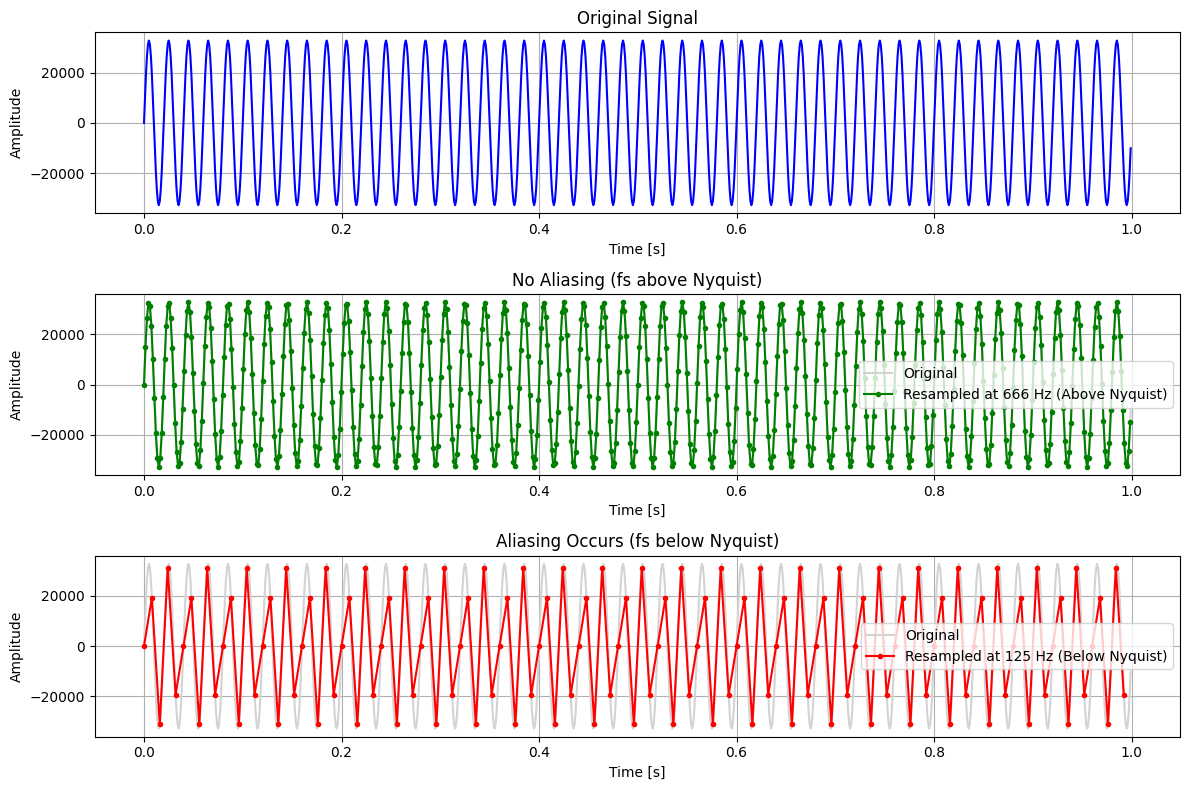

In [14]:
plt.figure(figsize=(12,8))

 #Original signal
plt.subplot(3,1,1)
plt.plot(t_2, signal, 'b')
plt.title("Original Signal")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid(True)

# Resampled above Nyquist
plt.subplot(3,1,2)
plt.plot(t_2, signal, 'lightgray', label="Original")
plt.plot(t_above, signal_above, 'g.-', label=f"Resampled at {fs_above} Hz (Above Nyquist)")
plt.title("No Aliasing (fs above Nyquist)")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)

# Resampled below Nyquist
plt.subplot(3,1,3)
plt.plot(t_2, signal, 'lightgray', label="Original")
plt.plot(t_below, signal_below, 'r.-', label=f"Resampled at {fs_below} Hz (Below Nyquist)")
plt.title("Aliasing Occurs (fs below Nyquist)")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


### **Task 2.3:** Comments of the Output
